# **Let's Build a simple Neural Network from Scratch using TensorFlow.**

* **Importing the Necessary Libraries.**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

* **Generating Random Data.**

**Let's also Define and Create a Random Linear Function for our Targets:**

# $f(x) = w1x1 + w2x2 + b + Noise$

Where:
* w1 = 2 | Arbitrarily Chosen
* w2 = -3 | Arbitrarily Chosen
* b = 5 | Arbitrarily Chosen
* Noise = Random Number Between 0 and 1 | Especially used in Real-World Scenario to Randomize the Data a Bit

Conceptually Speaking, the Algorithm will have to Understand and Know that this is the function we've used for Training the Model and the One it'll use for Predicting Values.


In [2]:
#Creating Random Data with Linear Correlation

Samples = 1000
nVariables = 1

xOne = np.random.uniform(-10, 10, Samples*nVariables)
xTwo = np.random.uniform(-10, 10, Samples*nVariables)

#Putting the 2 Inputs into a single Matrix
xInputs = np.column_stack((xOne, xTwo))

Noise = np.random.uniform(-1, 1, Samples*nVariables)

Targets = 2*xOne -3*xTwo + 5 + Noise

#print(xInputs.shape)


In [3]:
#Targets Default Shape is (1000,), while we need a (1000, 1) Shape in order to not get any Error.

Targets.shape
Targets = Targets.reshape(Samples, 1)
#Targets

In [4]:
#Let's Save the Data into a .npz File.

np.savez("RandomData", Inputs = xInputs, Targets = Targets)

* **Loading the Data we just Saved.**

In [5]:
TrainData = np.load("RandomData.npz")

* **Building the Model.**

In [6]:
#Defining the Size of Input and Output Data.

InputSize = 2 #Since 2 are our Inputs
OutputSize = 1 #Since 1 is our Output

Iterations = 100

Model = tf.keras.Sequential([
                            #The Dense() Method Calculates the DotProduct of the Inputs and Weights and adds the Bias.
                            #In the Brackets we only need to Specify the Output Size.
                            #tf.keras.layers.Dense(OutputSize) <==> Outputs = np.dot(xInputs, Weights) + Biases
                            tf.keras.layers.Dense(OutputSize,
                                                  #Initializing Weights and Biases as a Random Number within the Interval (-1, 1)
                                                  kernel_initializer = tf.random_uniform_initializer(minval = -1, maxval = 1),
                                                  bias_initializer = tf.random_uniform_initializer(minval = -1, maxval = 1))
                            ])

#Customizing the Optimizer and Setting the Learning Rate at 0.02
CustomOptimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)

#Using the Compile Method to add the Optimization Algorithm and Loss/Objective Function 
Model.compile(optimizer = CustomOptimizer, loss = "mean_squared_error")

#Fitting the Model
#verbose = 0 Silent Mode and no Progress Bar Shown, to see Progress Bar set verbose = 1, for One Line per Epoch set verbose = 2
Model.fit(TrainData["Inputs"], TrainData["Targets"], epochs = Iterations, verbose = 1)

2023-02-16 11:50:31.129685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-16 11:50:31.129736: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 14.7722
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9490
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4336
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3855
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3695
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4665
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4076
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4095
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3591
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3857
Epoch 13/100
32/32 [================

* **Let's Check the Weights and Biases.**

In [7]:
#Weights
Model.layers[0].get_weights()[0]

array([[ 1.9414728],
       [-2.9735548]], dtype=float32)

In [8]:
#Biases
Model.layers[0].get_weights()[1]

array([4.9668875], dtype=float32)

**By Checking the Weights, we can Clearly see that our Weights are 2 and -3, while the Bias is around 5.**
**The Model Understood the Underlying Relationship in Data.**

* **Now let's try to make some Predictions with our Model.**

In [9]:
#Outputs after 100 Epoch of Training.
Outputs = Model.predict_on_batch(TrainData["Inputs"])

* **Let's Plot the Outputs and the Targets.**

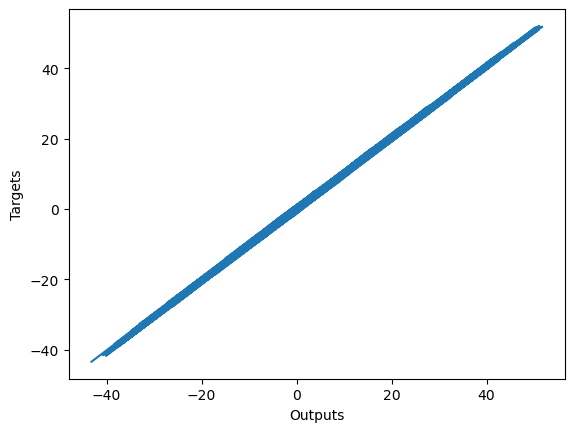

In [10]:
#The Closer to a 45° Line the Closer the Outputs to the Targets.

plt.plot(Outputs, Targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()